In [1]:
import warnings
from pathlib import Path

import iris
import iris.pandas
import matplotlib.pyplot as plt
import numpy as np
from aeolus.calc.diag import toa_eff_temp
from aeolus.calc.stats import spatial_mean
from aeolus.coord import get_cube_rel_days, interp_to_cube_time
from aeolus.model import um
from aeolus.plot import add_custom_legend, subplot_label_generator
metallicity = "solar"
from aeolus.coord import coord_to_cube, regrid_3d, replace_z_coord, volume_weights_cube
from aeolus.model import um

In [6]:
#DIRECTORY = ('/data/mz355/um_runs/wasp96b/equilibrium/u-cp158/')
#print(DIRECTORY)
#test = DIRECTORY["raw"]

In [2]:
DATA_DIR = Path.cwd().parent.parent.parent/"data" / "mz355" /"um_runs"/"wasp96b"/"equilibrium"/"u-cp158"/"raw"/"atmos_base_0120" 
SPECTRUM_DIR = Path.home().parent.parent/ "data" / "mz355" / "um_inputs" / "planets" /  "wasp96b" /  "spectral_files"

#/ "um" / "um" / "uoesa_data" / "current" / "spectral" / "HD209_CK"

#atmosa.d00000010_00

data_file = DATA_DIR / "atmosa.pd000000110_00"

xy_file= iris.load(data_file)

print(xy_file)

0: toa_incoming_shortwave_flux / (W m-2) (latitude: 90; longitude: 144)
1: toa_outgoing_longwave_flux / (W m-2) (latitude: 90; longitude: 144)
2: toa_outgoing_shortwave_flux / (W m-2) (latitude: 90; longitude: 144)


In [3]:
#POST PROCESSING
# DATA_DIR = Path.home().parent.parent/ "data" / "mz355" / "um_runs" / "wasp96b" / "kinetics" / "u-cp238" / "raw" / "atmos_base_1001" 
# DATA_DIR_eq = Path.home().parent.parent/ "data" / "mz355" / "um_runs" / "wasp96b" / "equilibrium" / "u-cp158" / "raw" / "atmos_base_1001" 

parents_dir = Path.cwd().parent.parent.parent/"data" / "mz355" /"um_runs"/"wasp96b"/"equilibrium"/"u-cp770"/"raw"
flist = []
for file in parents_dir.glob('**/atmos_base_*/atmosa.pd*'):  # this directory and all subdirectories, recursively
    flist.append(str(file))

len(sorted(flist))

print(sorted(flist))

['/data/mz355/um_runs/wasp96b/equilibrium/u-cp770/raw/atmos_base_0010/atmosa.pd00000000_00', '/data/mz355/um_runs/wasp96b/equilibrium/u-cp770/raw/atmos_base_0020/atmosa.pd00000010_00', '/data/mz355/um_runs/wasp96b/equilibrium/u-cp770/raw/atmos_base_0030/atmosa.pd00000020_00']


In [9]:
test_dir = parents_dir/"atmos_base_0120"
test_dir
test_load = test_dir/"atmosa.pb000000110_00"

pd0 = iris.load(test_load)

print(pd0)

0: air_pressure / (Pa)                 (model_level_number: 67; latitude: 90; longitude: 144)
1: air_temperature / (K)               (model_level_number: 66; latitude: 90; longitude: 144)


/home/bm424/miniconda3/envs/hot_jupiter/lib/python3.10/site-packages/iris/fileformats/rules.py:353: UserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(msg.format(factory=factory_name))


In [10]:
parents_dir_kin = Path.home().parent.parent/"data" / "mz355" /"um_runs"/"wasp96b"/"kinetics"/"u-cp238"/"raw"

flist_kin = []
for file in parents_dir_kin.glob('**/atmos_base_*/atmosa.pd*'):  # this directory and all subdirectories, recursively
    flist_kin.append(str(file))

len(sorted(flist_kin))

print(sorted(flist_kin))


['/data/mz355/um_runs/wasp96b/kinetics/u-cp238/raw/atmos_base_0010/atmosa.pd00000000_00', '/data/mz355/um_runs/wasp96b/kinetics/u-cp238/raw/atmos_base_0020/atmosa.pd00000010_00', '/data/mz355/um_runs/wasp96b/kinetics/u-cp238/raw/atmos_base_0030/atmosa.pd00000020_00', '/data/mz355/um_runs/wasp96b/kinetics/u-cp238/raw/atmos_base_0040/atmosa.pd00000030_00', '/data/mz355/um_runs/wasp96b/kinetics/u-cp238/raw/atmos_base_0050/atmosa.pd00000040_00', '/data/mz355/um_runs/wasp96b/kinetics/u-cp238/raw/atmos_base_0060/atmosa.pd00000050_00', '/data/mz355/um_runs/wasp96b/kinetics/u-cp238/raw/atmos_base_0070/atmosa.pd00000060_00', '/data/mz355/um_runs/wasp96b/kinetics/u-cp238/raw/atmos_base_0080/atmosa.pd00000070_00', '/data/mz355/um_runs/wasp96b/kinetics/u-cp238/raw/atmos_base_0090/atmosa.pd00000080_00', '/data/mz355/um_runs/wasp96b/kinetics/u-cp238/raw/atmos_base_0100/atmosa.pd00000090_00', '/data/mz355/um_runs/wasp96b/kinetics/u-cp238/raw/atmos_base_0110/atmosa.pd000000100_00', '/data/mz355/um_run

In [11]:
cl = iris.load(flist)

In [12]:
cl_kin = iris.load(flist_kin)

In [13]:
cl

[<iris 'Cube' of toa_incoming_shortwave_flux / (W m-2) (time: 100; latitude: 90; longitude: 144)>,
<iris 'Cube' of toa_outgoing_longwave_flux / (W m-2) (time: 99; latitude: 90; longitude: 144)>,
<iris 'Cube' of toa_outgoing_shortwave_flux / (W m-2) (time: 100; latitude: 90; longitude: 144)>]

In [14]:
cl_kin

[<iris 'Cube' of toa_incoming_shortwave_flux / (W m-2) (time: 100; latitude: 90; longitude: 144)>,
<iris 'Cube' of toa_outgoing_longwave_flux / (W m-2) (time: 99; latitude: 90; longitude: 144)>,
<iris 'Cube' of toa_outgoing_shortwave_flux / (W m-2) (time: 100; latitude: 90; longitude: 144)>]

In [15]:
toa_isr = cl.extract_cube("toa_incoming_shortwave_flux")
_toa_olr = cl.extract_cube("toa_outgoing_longwave_flux")
toa_osr = cl.extract_cube("toa_outgoing_shortwave_flux")

In [16]:
toa_isr_kin = cl_kin.extract_cube("toa_incoming_shortwave_flux")
_toa_olr_kin = cl_kin.extract_cube("toa_outgoing_longwave_flux")
toa_osr_kin = cl_kin.extract_cube("toa_outgoing_shortwave_flux")

In [17]:
toa_isr.remove_coord("forecast_period")
_toa_olr.remove_coord("forecast_period")
toa_osr.remove_coord("forecast_period")



In [18]:
toa_isr_kin.remove_coord("forecast_period")
_toa_olr_kin.remove_coord("forecast_period")
toa_osr_kin.remove_coord("forecast_period")

In [19]:
toa_olr = interp_to_cube_time(_toa_olr, toa_isr, model=um)
toa_isr_mean = spatial_mean(toa_isr, model=um)
toa_olr_mean = spatial_mean(toa_olr, model=um)
toa_net_mean = spatial_mean(toa_isr - toa_olr - toa_osr, model=um)



In [20]:
toa_olr_kin = interp_to_cube_time(_toa_olr_kin, toa_isr_kin, model=um)
toa_isr_mean_kin = spatial_mean(toa_isr_kin, model=um)
toa_olr_mean_kin = spatial_mean(toa_olr_kin, model=um)
toa_net_mean_kin = spatial_mean(toa_isr_kin - toa_olr_kin - toa_osr_kin, model=um)

In [21]:
toa_isr_mean.rename("global_mean_toa_incoming_energy_flux")
toa_net_mean.rename("global_mean_toa_net_energy_flux")
time_in_rel_days = get_cube_rel_days(toa_isr, model=um) + 10

print(time_in_rel_days)

[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.  120.
  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.  240.
  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.  360.
  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.  480.
  490.  500.  510.  520.  530.  540.  550.  560.  570.  580.  590.  600.
  610.  620.  630.  640.  650.  660.  670.  680.  690.  700.  710.  720.
  730.  740.  750.  760.  770.  780.  790.  800.  810.  820.  830.  840.
  850.  860.  870.  880.  890.  900.  910.  920.  930.  940.  950.  960.
  970.  980.  990. 1000.]


In [22]:
toa_isr_mean_kin.rename("global_mean_toa_incoming_energy_flux")
toa_net_mean_kin.rename("global_mean_toa_net_energy_flux")
time_in_rel_days_kin = get_cube_rel_days(toa_isr_kin, model=um) + 10

print(time_in_rel_days_kin)

[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.  120.
  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.  240.
  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.  360.
  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.  480.
  490.  500.  510.  520.  530.  540.  550.  560.  570.  580.  590.  600.
  610.  620.  630.  640.  650.  660.  670.  680.  690.  700.  710.  720.
  730.  740.  750.  760.  770.  780.  790.  800.  810.  820.  830.  840.
  850.  860.  870.  880.  890.  900.  910.  920.  930.  940.  950.  960.
  970.  980.  990. 1000.]


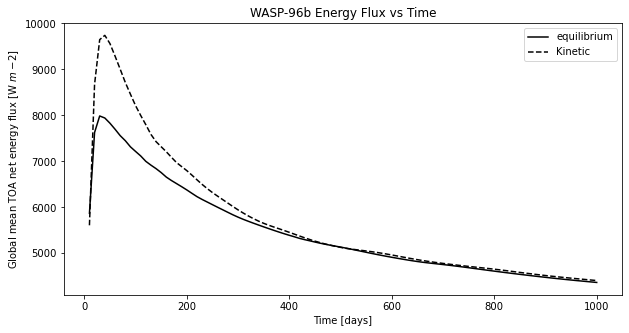

In [25]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(
    time_in_rel_days,
    toa_net_mean.data,
    label = 'equilibrium',
    color = 'k'
)
ax.plot(
    time_in_rel_days_kin,
    toa_net_mean_kin.data,
    label = 'Kinetic',
    color = 'k',
    linestyle = "dashed"
)
ax.set_ylabel("Global mean TOA net energy flux [W $m^ {-2}$]")
ax.set_xlabel("Time [days]")
ax.set_title("WASP-96b Energy Flux vs Time")
ax.legend()
plt.savefig("wasp96b_netenergyflux.png")